In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# checking total number of duplicated rows
df.duplicated().sum()

0

In [6]:
# Number of records of people enrolled to bank
df['Exited'].value_counts()
# As we can see the below values, there is imbalance in the classification

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
# Dropping irrelevant columns
df.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace = True)
# inplace = True makes the changes permanant

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# performing one-hot encoding for categorical data
import pandas as pd

# Assuming df is your DataFrame
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True, dtype=np.int64)

# We are dropping the firt column as 3 categories can be represented by 2 column and 2 category of gender column in one column

In [12]:
# Scaling all the columns as we can see that the values of the column is not comparable
# values of salary columns are much much higher
# We are scaling beacuse in the time of calculation of weights it takes very long to converge


In [13]:
# Splitting data
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [15]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In [16]:
# Scaling the training and test data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

'''Scaling is a crucial step in many machine learning algorithms, and it involves standardizing or normalizing the features of your dataset. The reason for using different functions for scaling the training and testing data is to prevent data leakage and ensure that your model generalizes well to new, unseen data.

When you scale your data, you calculate statistics (like mean and standard deviation) based on the training set and use these statistics to scale both the training and testing sets. This is why you use fit_transform on the training data—it calculates the scaling parameters (mean and standard deviation) and applies the transformation to the training set.

However, when it comes to the testing set, you don't want to recalculate the scaling parameters because it's important that the scaling is consistent with what the model learned during training. If you used the statistics from the testing set to scale it, the model would essentially have information about the testing set during training, leading to optimistic and inaccurate performance estimates.

So, by using transform on the testing set, you apply the same scaling transformation that was learned from the training set. This ensures that the testing data is scaled in the same way as the training data, maintaining the integrity of the model evaluation on unseen data.'''


"Scaling is a crucial step in many machine learning algorithms, and it involves standardizing or normalizing the features of your dataset. The reason for using different functions for scaling the training and testing data is to prevent data leakage and ensure that your model generalizes well to new, unseen data.\n\nWhen you scale your data, you calculate statistics (like mean and standard deviation) based on the training set and use these statistics to scale both the training and testing sets. This is why you use fit_transform on the training data—it calculates the scaling parameters (mean and standard deviation) and applies the transformation to the training set.\n\nHowever, when it comes to the testing set, you don't want to recalculate the scaling parameters because it's important that the scaling is consistent with what the model learned during training. If you used the statistics from the testing set to scale it, the model would essentially have information about the testing set d

In [17]:
X_trained_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
pip install tensorFlow

Note: you may need to restart the kernel to use updated packages.


In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [45]:
## Architecture of Neural Network
# There are two types of model 
model = Sequential()

# We will using 3 nodes, We use add function
# Dense function is used to create layer

# This is input layer
# model.add(Dense(3, activation = 'relu', input_dim = 11)) #As we have 11 input columns
model.add(Dense(11, activation = 'relu', input_dim = 11)) 

# hidden layer
model.add(Dense(11, activation = 'relu', input_dim = 11)) #As we have 11 input columns

# this is output layer
model.add(Dense(1, activation = 'sigmoid'))


In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Model compilation stage  for gradient descent
# As its a binary classification its binary cross entropy is used
# model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [78]:
# Training the data set
# Epochs tells you the iteration for finding the weight
model.fit(X_trained_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3020 - accuracy: 0.8781 - val_loss: 0.3349 - val_accuracy: 0.8525
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8769 - val_loss: 0.3325 - val_accuracy: 0.8544
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8789 - val_loss: 0.3346 - val_accuracy: 0.8544
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8764 - val_loss: 0.3351 - val_accuracy: 0.8562
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8773 - val_loss: 0.3331 - val_accuracy: 0.8525
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3013 - accuracy: 0.8777 - val_loss: 0.3346 - val_accuracy: 0.8500
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8777 - val_loss: 0.3345 - val_accuracy: 0.8537

KeyboardInterrupt: 

In [60]:
# Weights of input layer

model.layers[0].get_weights()
# We can see in the output that we have 33 layers
# the last three are the bias


[array([[-0.09976168,  0.5907575 , -0.06169327,  0.06382576, -0.06673948,
         -0.3879387 , -0.13068189, -0.45897993, -0.3729103 , -0.06840406,
         -0.02330129],
        [-0.5752374 , -0.23860663,  1.412804  , -0.3949412 ,  0.17530364,
         -0.9342807 , -0.04648294, -1.1501329 ,  0.31517476,  0.01891734,
          0.3721983 ],
        [-0.24365771,  0.5667581 , -0.39467323, -0.30561328, -0.35760954,
         -0.24938153,  0.24110314, -0.18089035,  0.22273153,  0.014609  ,
         -0.19179362],
        [-0.6168819 , -0.5664822 , -0.28956312, -0.664835  ,  0.10138931,
         -0.20890114, -0.8558839 ,  0.30076814, -0.17984882,  1.4286057 ,
          0.6788362 ],
        [ 0.04308292, -0.509516  ,  0.26605505, -0.08209921, -1.1639907 ,
         -0.0495824 , -0.28237036,  0.3957846 , -1.3569072 , -0.05549704,
          1.0990909 ],
        [-0.04447197,  0.0069619 , -0.1985656 , -0.10836428, -0.26267448,
         -0.24999098,  0.03559808,  0.3329009 ,  0.1139055 , -0.0201665

In [61]:
# Weights of output layer layer

model.layers[1].get_weights()

[array([[-0.37427804, -0.94035614,  0.4440322 , -0.9671852 ,  0.3940252 ,
         -0.6069511 , -0.34447482, -0.2789808 ,  0.21505204,  0.41243318,
         -0.3726318 ],
        [ 0.4117142 ,  0.098213  ,  0.5345253 ,  0.06085334,  0.36949402,
         -0.07966939, -0.17961596,  0.7018631 ,  0.15575069, -0.15555523,
          0.2103123 ],
        [ 0.50320286,  0.37911424,  0.20196399,  0.39372906,  0.25796458,
          0.8891484 , -0.7185121 ,  0.29381528,  0.45240825, -1.0398448 ,
          0.2021232 ],
        [ 0.28019324,  0.51424617, -0.827046  ,  0.66750914, -0.19331191,
         -1.6213198 ,  0.03181925, -0.11124533, -0.56921273,  0.6461105 ,
         -0.5857105 ],
        [-0.79017246,  0.20445655, -0.75796616, -0.60230684,  0.539425  ,
          0.32310122, -0.647655  ,  0.2988864 ,  0.13595472,  0.03824025,
          0.6522069 ],
        [-0.09066954, -0.1002325 , -0.90428144, -0.21294142, -0.27558684,
         -1.1511121 , -0.5098058 , -0.30187625, -1.233524  , -0.0116869

In [62]:
y_log = model.predict(X_test_scaled)
# as we are using sigmoid function, the resulting value will be probability ]
# We need to convert probability into binary values, to achieve that we need to have
# threshold
# in this example will be taking 0.5 as the threshold, so anything below 0.5 will be consdiered as 0 and above 0.5 will be 1
# we need to use AUC and Roc curve to find the optimum threshold


63/63 [==============================] - 0s 998us/step


In [63]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8665

Changes we can do to increase the performance
* Increase epochs.
* We can increase the number of nodes in input layer.
* We can use relu instead of sigmoid, as in general relu give better performance. Put it in input layer.
* We can increase the number of layers.
* Use validataion split to check the performance of the model

Validation split
* observation 1: We need to make sure in every epoch the loss is dropping and accuracy is increasing.
* Observation 2: There is very important thing, we need to observe the validation accuracy and total accuracy together as if only total accuracy is increasing but validation accuracy is not then thats the case of overfitting.


## Creating plots on model

In [79]:
# We will the store it in a new dictionary varibale name history
history1 = model.fit(X_trained_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8788 - val_loss: 0.3343 - val_accuracy: 0.8569
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8773 - val_loss: 0.3353 - val_accuracy: 0.8575
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8752 - val_loss: 0.3341 - val_accuracy: 0.8525
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8778 - val_loss: 0.3353 - val_accuracy: 0.8531
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8781 - val_loss: 0.3357 - val_accuracy: 0.8544
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8791 - val_loss: 0.3345 - val_accuracy: 0.8525
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8767 - val_loss: 0.3381 - val_accuracy: 0.8550

In [80]:
import matplotlib.pyplot as plt

(0.0, 0.5)

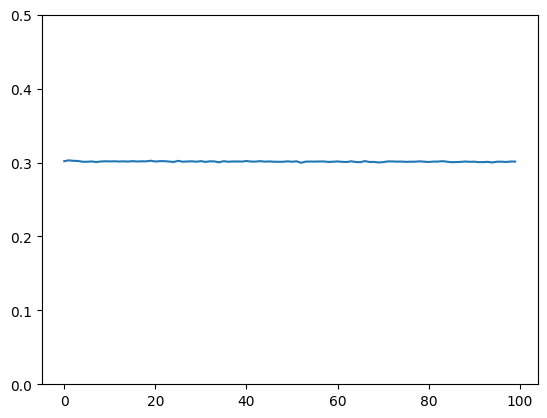

In [87]:
plt.plot(history1.history['loss'])
plt.ylim(0.0, 0.5)